# Modeling Hodgkin Lymphoma and Associated Treatment Guidelines in OWL [Part I. Creating Ontology] - Python Extension

#### Hannah Grossman (HLG), Matt Schwede (MSchwede), Julie Kong (ejkong), Michal Zielinski (mzielinski)

#### Load packages

In [1]:
# !pip3 install owlready2
from owlready2 import *
import owlready2

In [2]:
root_dir = '/Users/hgrossman/stanford/bmi210

## Create our custom ontology with owlready2

##### You can refer to [owlready2 documentation](https://owlready2.readthedocs.io/en/v0.36/), for those interested

In [4]:
onto = get_ontology(f"{root_dir}/Blank_Ontology.owl").load()
with onto:
    class ClinicalFeatures(Thing): pass
    class BSymptoms(ClinicalFeatures): pass

    class ExtraNodalRegion(ClinicalFeatures): pass
    class Distant(ExtraNodalRegion):pass
    class Localized(ExtraNodalRegion):pass
    class Spleen(ExtraNodalRegion):pass
 
    class LymphNodeRegion(ClinicalFeatures):pass
    class AboveDiaphragm(LymphNodeRegion):pass
    class BelowDiaphragm(LymphNodeRegion): pass
    
    class has_extra_nodal_region(ObjectProperty):pass
    class has_above_diaphragm(ObjectProperty):pass      
    class has_below_diaphragm(ObjectProperty):pass 
    class has_symptoms(ObjectProperty):pass

    class Stage(Thing): pass            
    class I(Stage):
        equivalent_to = [(Stage & (has_above_diaphragm.exactly(0, AboveDiaphragm)) & (has_below_diaphragm.exactly(0, BelowDiaphragm))
                         & (has_extra_nodal_region.exactly(1, ExtraNodalRegion))) | (Stage
                         & (has_above_diaphragm.exactly(0, AboveDiaphragm))
                         & (has_below_diaphragm.exactly(1, BelowDiaphragm))
                         & (has_extra_nodal_region.exactly(0, ExtraNodalRegion))) | (Stage
                         & (has_above_diaphragm.exactly(1, AboveDiaphragm))
                         & (has_below_diaphragm.exactly(0, BelowDiaphragm))
                         & (has_extra_nodal_region.exactly(0, ExtraNodalRegion)))]
        def stage(self): print(self.__class__)
    class IA(I):
        equivalent_to = [I & has_symptoms.exactly(0, BSymptoms)]      
    class IB(I):
        equivalent_to = [I & has_symptoms.some(BSymptoms)]        
    class II(Stage):
        equivalent_to = [(Stage
                         & (has_above_diaphragm.min(0, AboveDiaphragm))
                         & (has_below_diaphragm.exactly(2, BelowDiaphragm))
                         & (has_extra_nodal_region.exactly(0, ExtraNodalRegion))) | (Stage
                         & (has_above_diaphragm.min(2, AboveDiaphragm))
                         & (has_below_diaphragm.exactly(0, BelowDiaphragm))
                         & (has_extra_nodal_region.exactly(0, ExtraNodalRegion))) | (Stage
                         & (has_above_diaphragm.exactly(0, AboveDiaphragm))
                         & (has_below_diaphragm.exactly(1, BelowDiaphragm))
                         & (has_extra_nodal_region.exactly(1, Localized))) | (Stage
                         & (has_above_diaphragm.exactly(1, AboveDiaphragm))
                         & (has_below_diaphragm.exactly(0, BelowDiaphragm))
                         & (has_extra_nodal_region.exactly(1, Localized)))]
    class IIA(II):
        equivalent_to = [II & has_symptoms.exactly(0, BSymptoms)]       
    class IIB(II):
        equivalent_to = [II & has_symptoms.some(BSymptoms)]       
    class III(Stage):
        equivalent_to = [Stage & has_above_diaphragm.some(AboveDiaphragm) & has_below_diaphragm.some(BelowDiaphragm) & has_extra_nodal_region.only(Localized | Spleen)]        
    class IV(Stage):
        equivalent_to = [Stage & has_extra_nodal_region.some(Distant) & has_above_diaphragm.min(0, AboveDiaphragm) & has_below_diaphragm.min(0, BelowDiaphragm)]

### Create instances of Lymph Node Regions, Extra Nodal Regions, and Symptoms to determine the correct Stage

In [5]:
thyroid = ExtraNodalRegion("thyroid")
liver = ExtraNodalRegion("liver")
kidney = ExtraNodalRegion("kidney")
localized = Localized("localized")
distant = Distant("distant")
distant2 = Distant("distant2")

laxilla = AboveDiaphragm("laxilla")
laxilla2 = AboveDiaphragm("laxilla2")
celiac = BelowDiaphragm("celiac")
celiac2 = BelowDiaphragm("celiac2")


AllDifferent([thyroid, liver, kidney, localized]) #extranodal
AllDifferent([laxilla, laxilla2, celiac, celiac2]) #lymph

fever = BSymptoms("fever")

### Create instances of specific Stages

In [6]:
ib = Stage("1b", has_extra_nodal_region = [thyroid], has_symptoms=[fever])
ia = Stage("1a", has_above_diaphragm = [laxilla])

iia = Stage("2a", has_above_diaphragm = [laxilla, laxilla2])
iib = Stage("2b", has_above_diaphragm = [laxilla, laxilla2], has_symptoms=[fever])
iia_ = Stage("2a_", has_above_diaphragm = [laxilla], has_extra_nodal_region=[localized])
iib_ = Stage("2b_", has_above_diaphragm = [laxilla], has_extra_nodal_region=[localized], has_symptoms=[fever])

iii = Stage("3", has_above_diaphragm=[laxilla], has_below_diaphragm=[celiac], has_extra_nodal_region = [localized])
iv = Stage("4", has_extra_nodal_region = [distant, distant2])
iv_ = Stage("4_", has_extra_nodal_region = [distant], has_below_diaphragm=[celiac])

close_world(Stage)

#### Function to save ontology

In [7]:
def save_ontology(ontology):
    ontology.save(f"/{root_dir}/HodgkinInstances.owl")

In [8]:
save_ontology(onto)

### Load ontology and sync reasoner

In [9]:
onto2 = get_ontology(f"{root_dir}/HodgkinInstances.owl").load()

with onto2:
    sync_reasoner_pellet([onto2], infer_property_values=True)

* Owlready2 * Running Pellet...
    java -Xmx2000M -cp /opt/anaconda3/lib/python3.8/site-packages/owlready2/pellet/httpclient-4.2.3.jar:/opt/anaconda3/lib/python3.8/site-packages/owlready2/pellet/aterm-java-1.6.jar:/opt/anaconda3/lib/python3.8/site-packages/owlready2/pellet/xercesImpl-2.10.0.jar:/opt/anaconda3/lib/python3.8/site-packages/owlready2/pellet/slf4j-api-1.6.4.jar:/opt/anaconda3/lib/python3.8/site-packages/owlready2/pellet/jena-tdb-0.10.0.jar:/opt/anaconda3/lib/python3.8/site-packages/owlready2/pellet/jena-iri-0.9.5.jar:/opt/anaconda3/lib/python3.8/site-packages/owlready2/pellet/owlapi-distribution-3.4.3-bin.jar:/opt/anaconda3/lib/python3.8/site-packages/owlready2/pellet/log4j-1.2.16.jar:/opt/anaconda3/lib/python3.8/site-packages/owlready2/pellet/jcl-over-slf4j-1.6.4.jar:/opt/anaconda3/lib/python3.8/site-packages/owlready2/pellet/slf4j-log4j12-1.6.4.jar:/opt/anaconda3/lib/python3.8/site-packages/owlready2/pellet/antlr-runtime-3.2.jar:/opt/anaconda3/lib/python3.8/site-packages

### Protege Screenshots of Created Ontology

#### Class Hierarchy

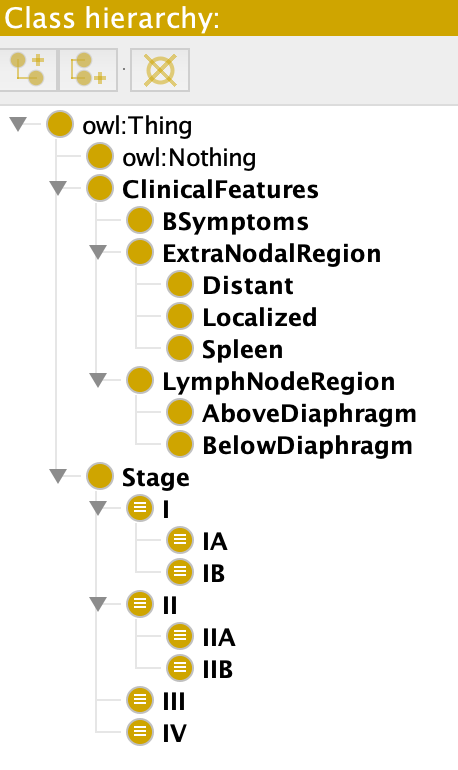

#### Each instance of stage correctly placed:

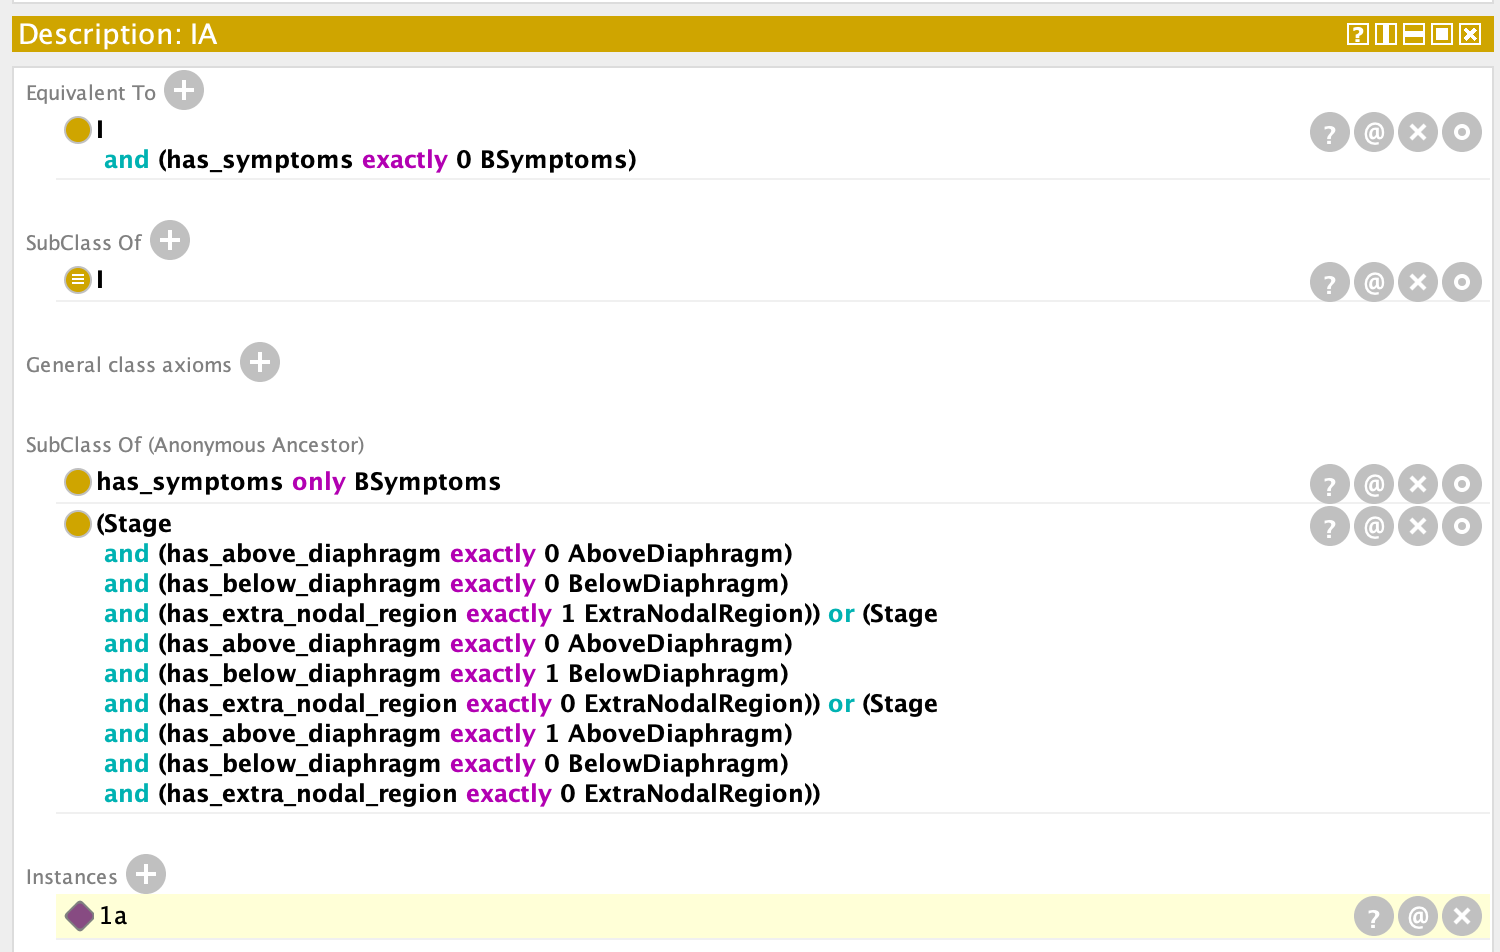

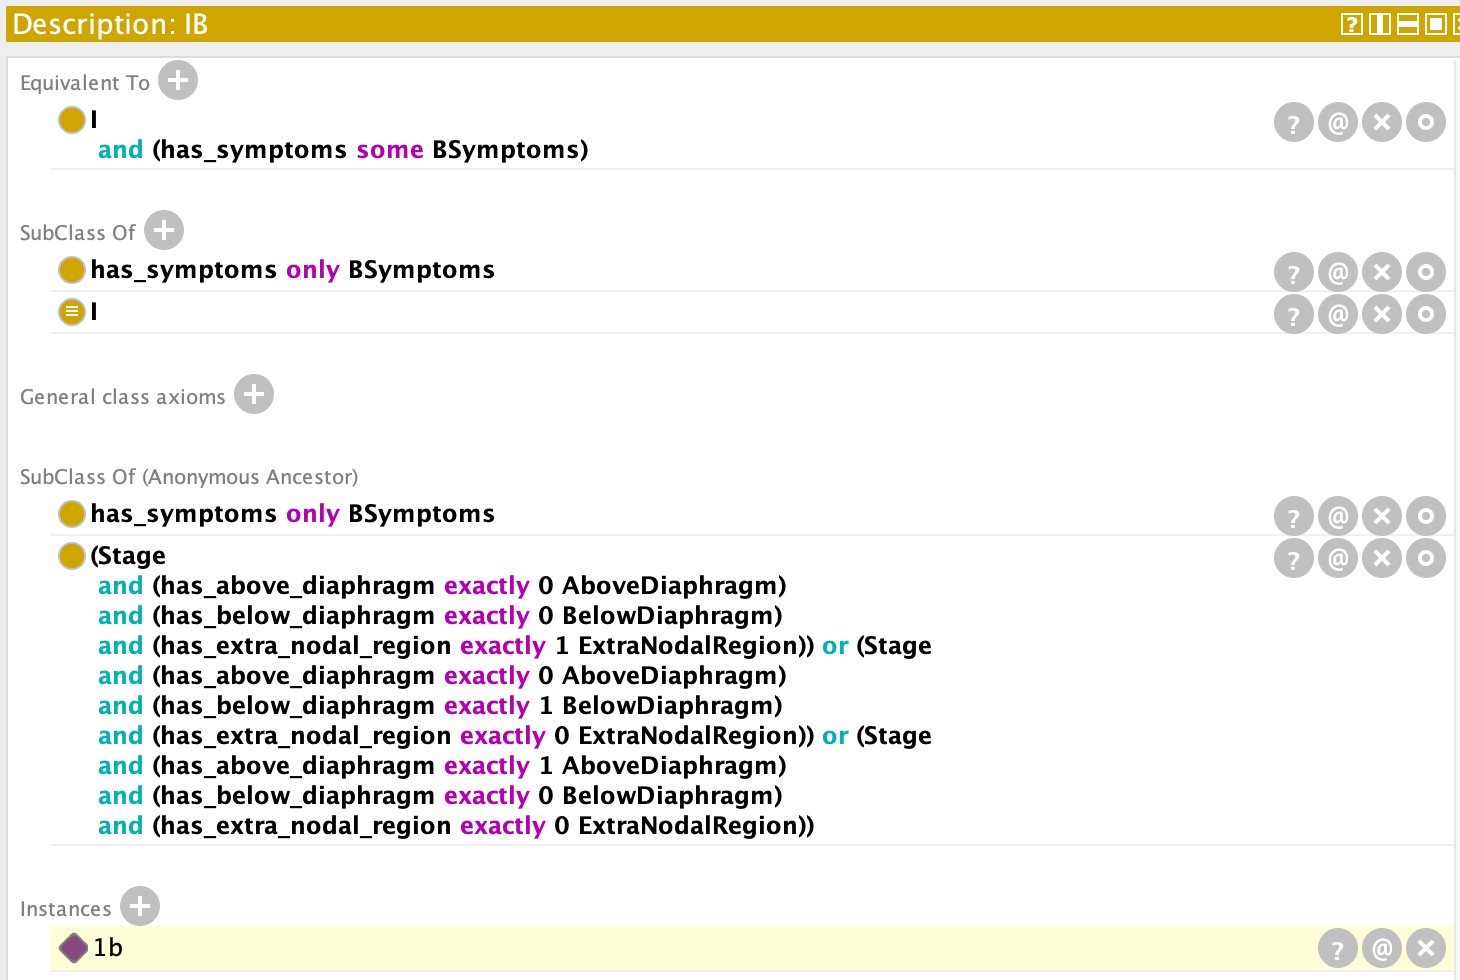

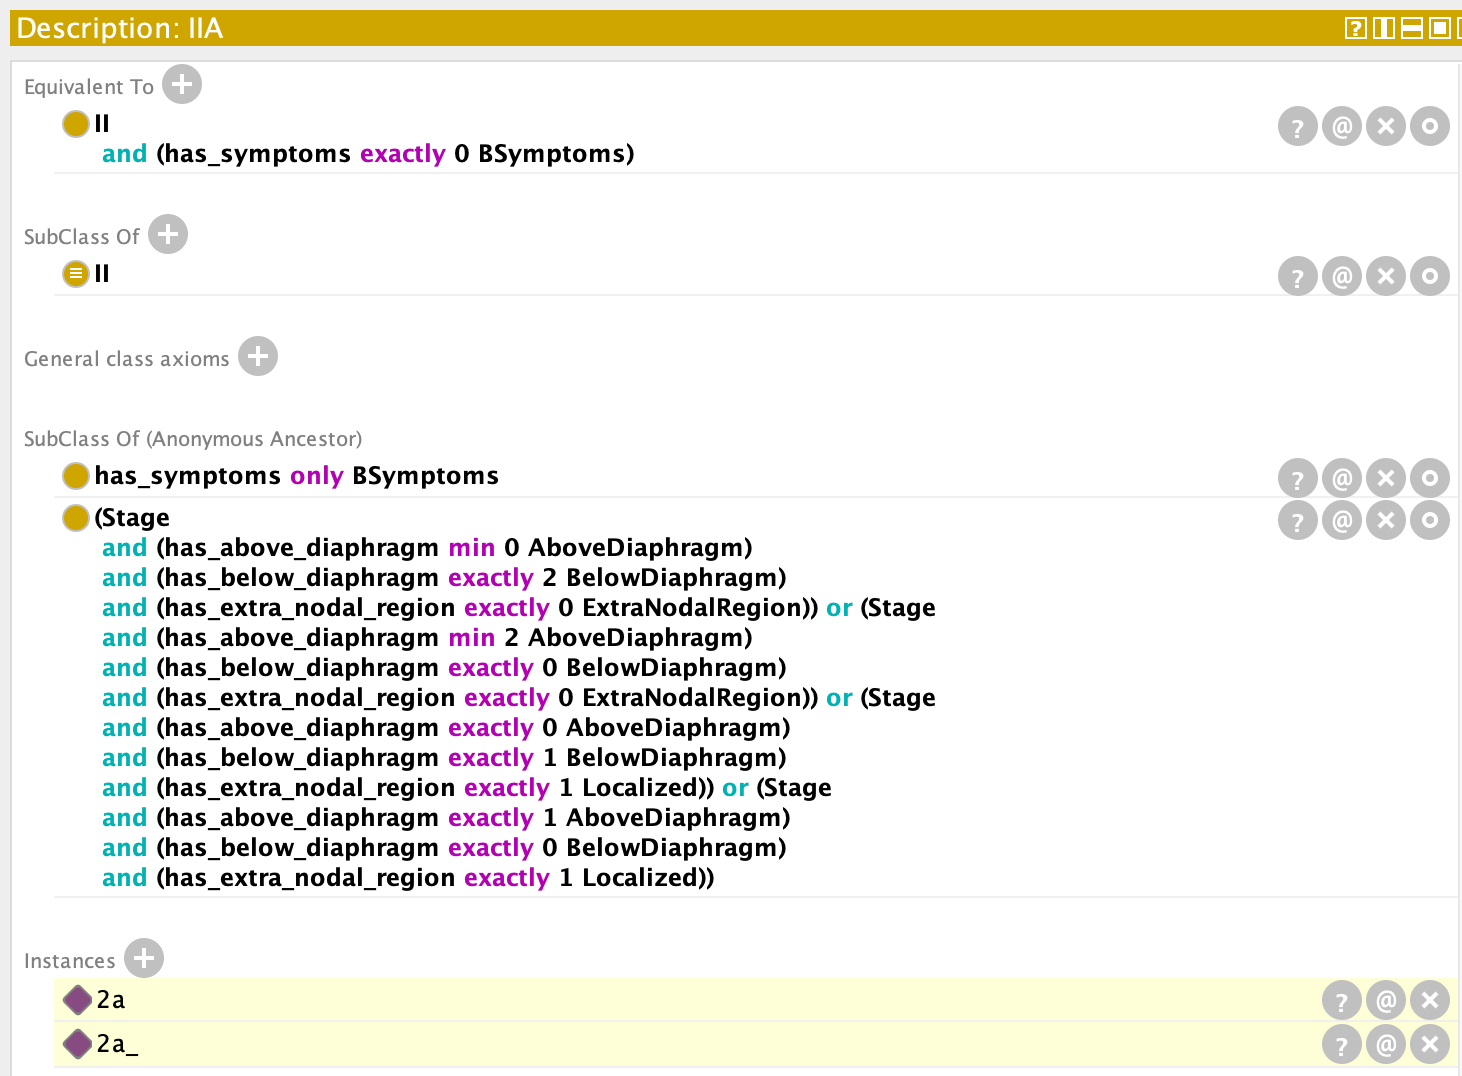

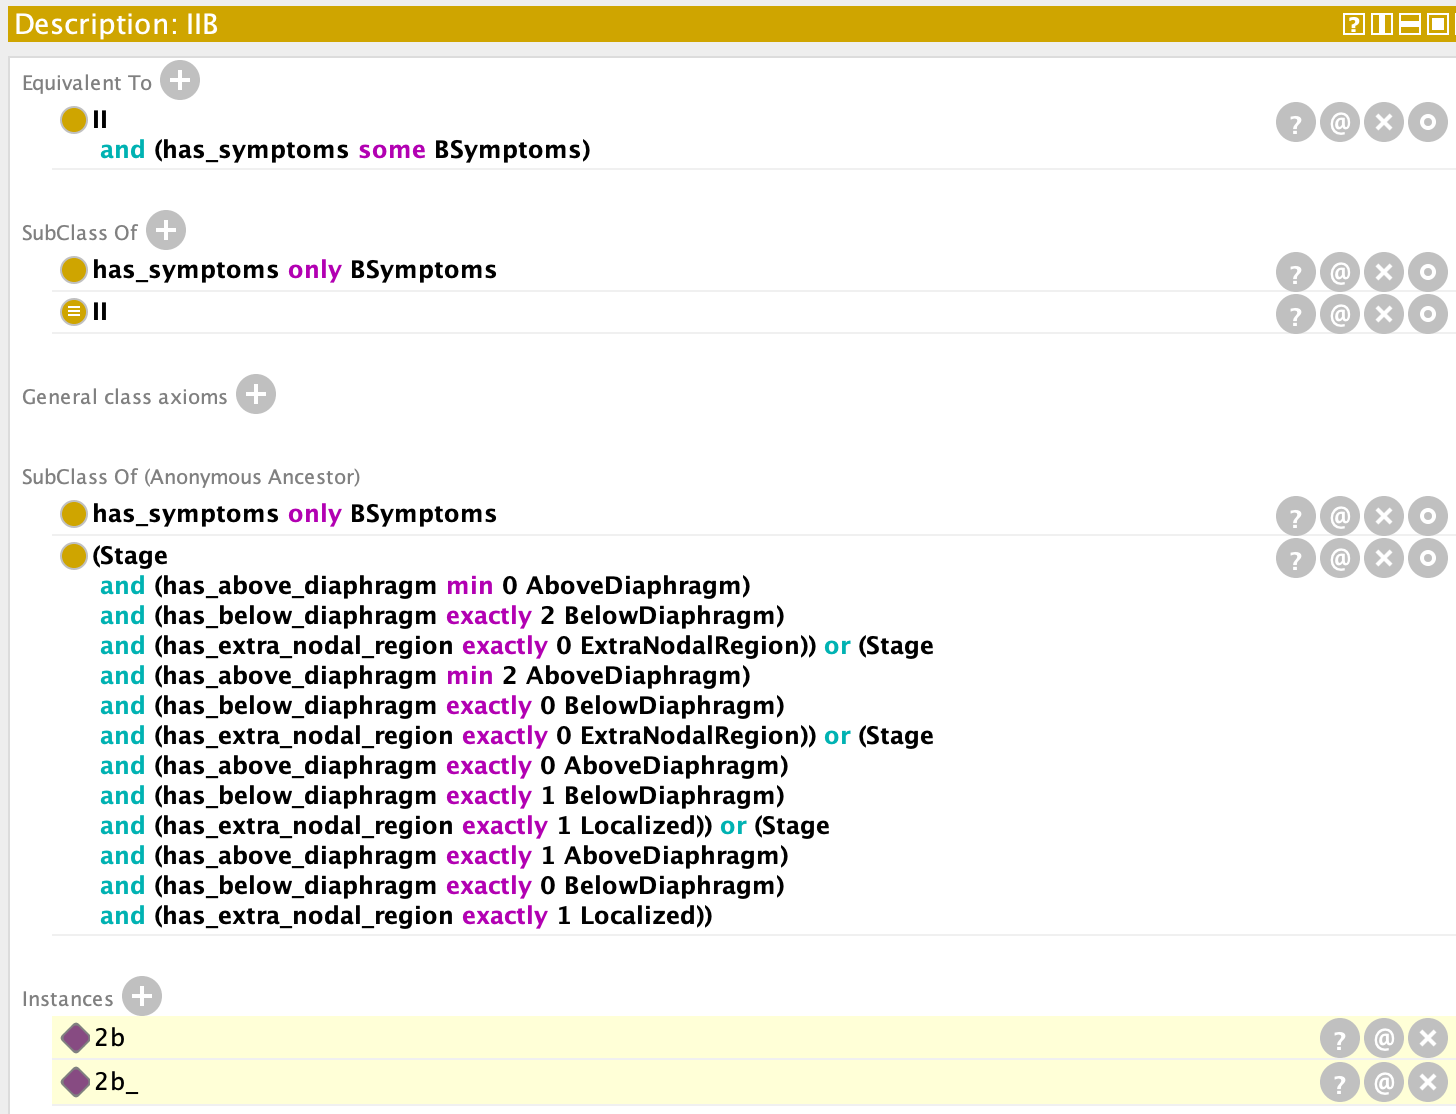

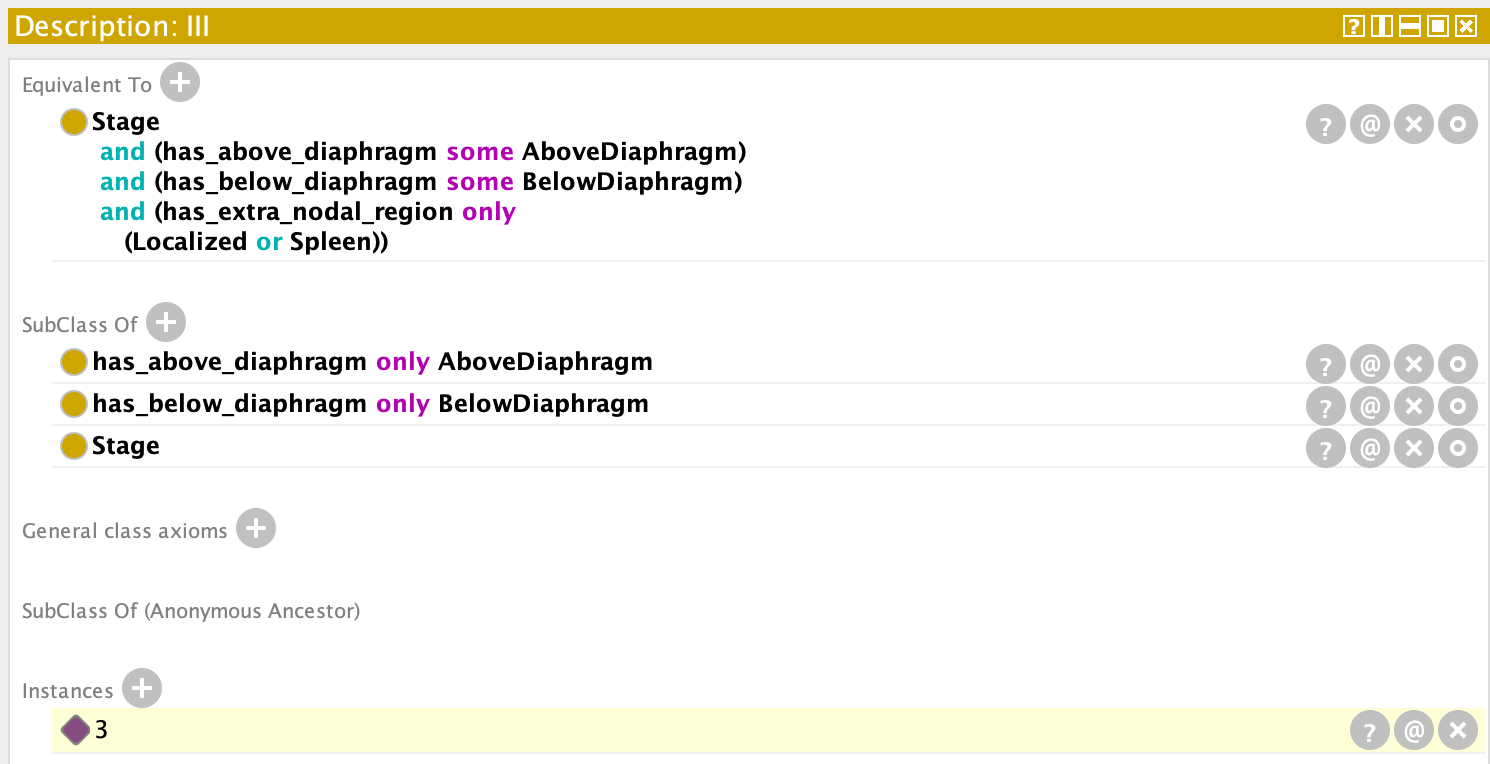

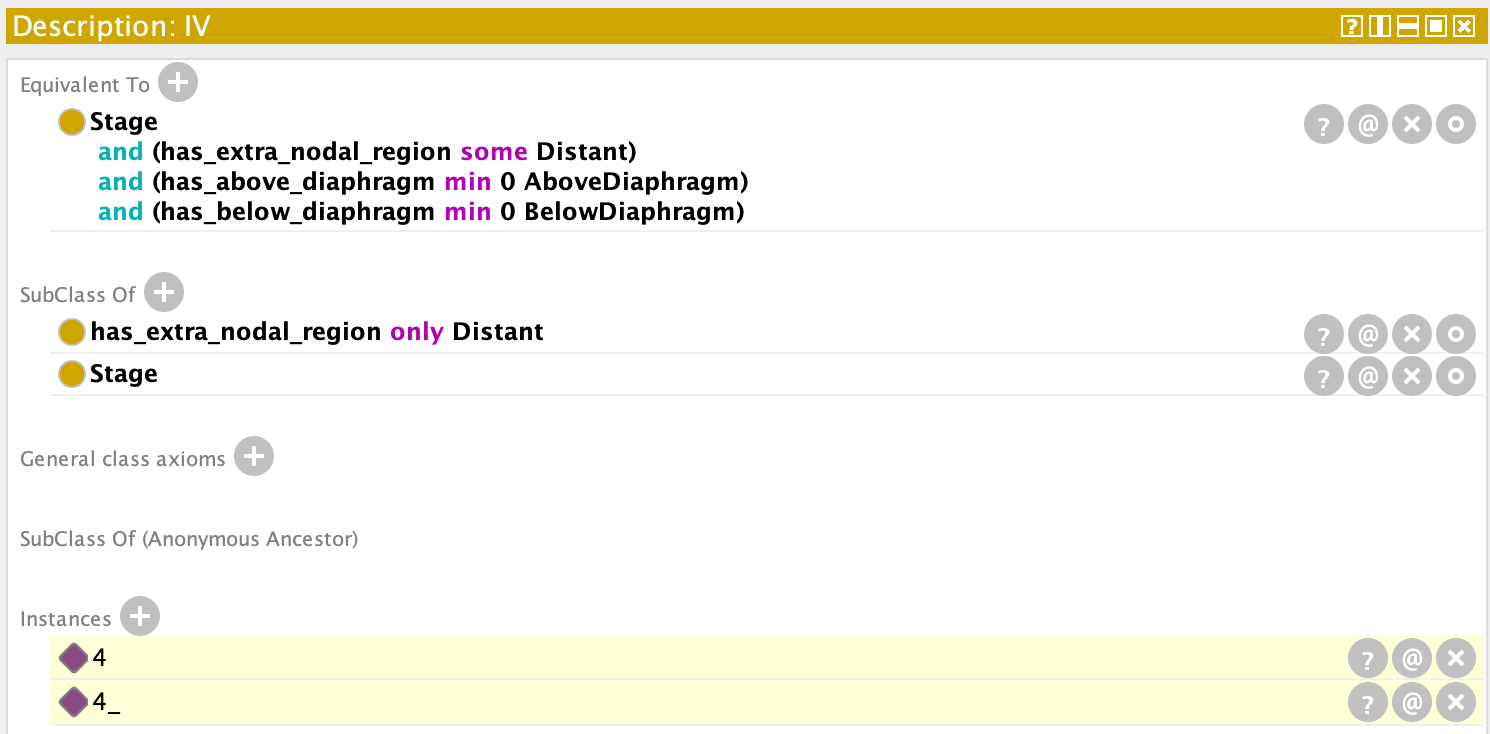

#### We continue to interact with our created ontology in Pt II.